## Advanced Electromagnetism - Short-antenna simulation

### Yves HERI

#### Michigan State Univeristy

___

This notebook contains code for the simulation of radiation resistance and directive gain for short antennas with approximated current given by

\begin{equation}
    I(z)=I_0\left(1-\Big|\frac{z}{L/2}\Big|\right)
\end{equation}


___

#### Import Librairies 

In [1]:
import numpy as np                          # For mathematical function 
import matplotlib.pyplot as plt             # For plotting 
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_context("paper",font_scale = 1.4)   # Plot style customization
from scipy import constants as cst
from scipy.integrate import quad            # For Numerical integration 
import warnings
warnings.filterwarnings("ignore")

#### Define global parameters

In [2]:
mu_o= cst.mu_0                  # Permeability of free space
c= cst.c                        # Speed of light
eps_o=cst.epsilon_0             # Compute the permitivity of free space
eta_o=np.sqrt(mu_o/eps_o)       # The intrinsic impedance of the free space

#### Define function for radiation resistance

\begin{equation}
    R_r=\frac{\pi}{2}\left(\frac{L}{\lambda}\right)^2\eta\int_0^\pi\left[ \frac{1-\cos\left(\pi\frac{L}{\lambda}\cos\theta\right)}{\left(\pi\frac{L}{\lambda}\cos\theta\right)^2}\right]^2\sin^3\theta d\theta
\label{eqRR}
\end{equation}

In [3]:
def R_r(x,L,eta): # x: angle, L: lenght/wavelength, eta: intrinsic impedance
    F1=(np.pi/2)*(L**2)*eta # Term outside the integral
    F2=1-np.cos(np.pi*L*np.cos(x)) # Numerator
    F3=(np.pi*L*np.cos(x))**2 # Denominator
    F4=(np.sin(x))**3 

    func=F1*((F2/F3)**2)*F4 
    return func

### Result for Radiation resistance

(0.0, 1.0)

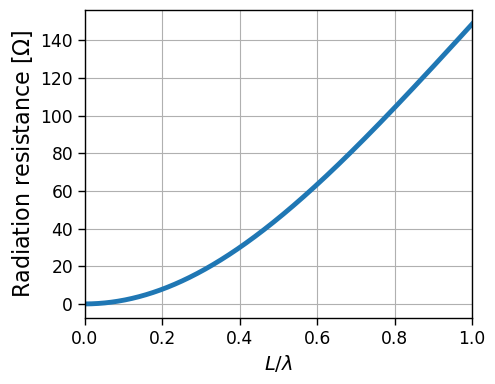

In [4]:
L=np.linspace(0,1,1000) # We define the values of L between 0 and 1

R=[] # Container of the results

for l in L: # For every value of L
    R.append(quad(R_r, 0, np.pi, args=(l,eta_o))[0]) # quad function used for integration
R=np.array(R)

##### Plot Radiation resistance #####

figure(figsize=(5, 4), dpi=100)
plt.plot(L,R,lw=3.5)
plt.xlabel('$L/\lambda$', fontsize=14)
plt.ylabel('Radiation resistance [$\Omega$]', fontsize=16)
plt.grid()
plt.xlim(0,1)

#### Function for directive gain

\begin{equation*}
    g_d(\theta)=2\frac{\left[ \frac{1-\cos\left(\pi\frac{L}{\lambda}\cos\theta\right)}{\left(\pi\frac{L}{\lambda}\cos\theta\right)^2}\right]^2\sin^2\theta}{\int_0^\pi\left[ \frac{1-\cos\left(\pi\frac{L}{\lambda}\cos\theta\right)}{\left(\pi\frac{L}{\lambda}\cos\theta\right)^2}\right]^2\sin^3\theta d\theta}
\end{equation*}

In [5]:
def g_d(x): # Input the angle in degree
  a=x*np.pi/180 # Change degree to radians
  def func(z):
    L=1/2 # This is the lenght divided by the wavelength
    F1=np.pi*L*np.cos(z)
    F2=np.cos(F1)
    return ((abs((1-F2)/(F1)**2))**2)*(np.sin(z))**3
  Num=func(a)/np.sin(a) # Numerator
  Den=quad(func, 0, np.pi)[0] # quad function for integration in denominator
  return 2*Num/Den

### Result for Radiation resistance

(0.0, 180.0)

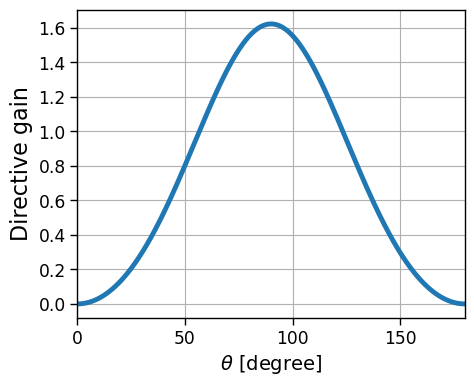

In [6]:
Theta=np.linspace(0,180,998) # We define the values of angle between 0 and 180
                             # we chose the step size so that 90deg is avoided
g=[]  # Container of the results

for t in Theta: # For every value of the angle
  g.append(g_d(t))
g=np.array(g)

##### Plot Radiation Directive gain #####

figure(figsize=(5, 4), dpi=100)
plt.plot(Theta,g,lw=3.5)
plt.xlabel(''r'$\theta$ [degree]', fontsize=14)
plt.ylabel('Directive gain', fontsize=16)
plt.grid()
plt.xlim(0,180)


___